In [1]:
import pandas as pd

In [2]:
def show_res(file: str):
  df = pd.read_csv(file)

  true = 0
  total = 0
  for _, row in df.iterrows():
    total += 1
    if row["exact_match"] == 1:
      true += 1
      
  print(true,total)
  print(true/total)

  prob_nsw_dict = {}

  for _, row in df.iterrows():
      tag = row["test_tag"].strip()
      if tag not in prob_nsw_dict.keys():
        prob_nsw_dict[tag] = {"true": 0,
                              "total": 0}
      prob_nsw_dict[tag]["total"] += 1
      if row["exact_match"] == 1:
        prob_nsw_dict[tag]["true"] += 1
        
  import matplotlib.pyplot as plt

  # Compute accuracy for each tag
  tag_accuracy = []
  for tag, values in prob_nsw_dict.items():
      accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
      tag_accuracy.append((tag, accuracy))

  # Sort by descending accuracy
  tag_accuracy.sort(key=lambda x: x[1], reverse=True)

  # Unpack
  tag_names, accuracies = zip(*tag_accuracy)

  # Plot
  plt.figure(figsize=(12, 6))
  bars = plt.bar(tag_names, accuracies, color='skyblue')
  plt.xlabel("NSW Type (Tag)")
  plt.ylabel("Accuracy")
  plt.title("Accuracy per NSW Type (Descending)")
  plt.ylim(0, 1.05)

  # Add percentage on top of bars
  for bar, acc in zip(bars, accuracies):
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

799 1191
0.670864819479429


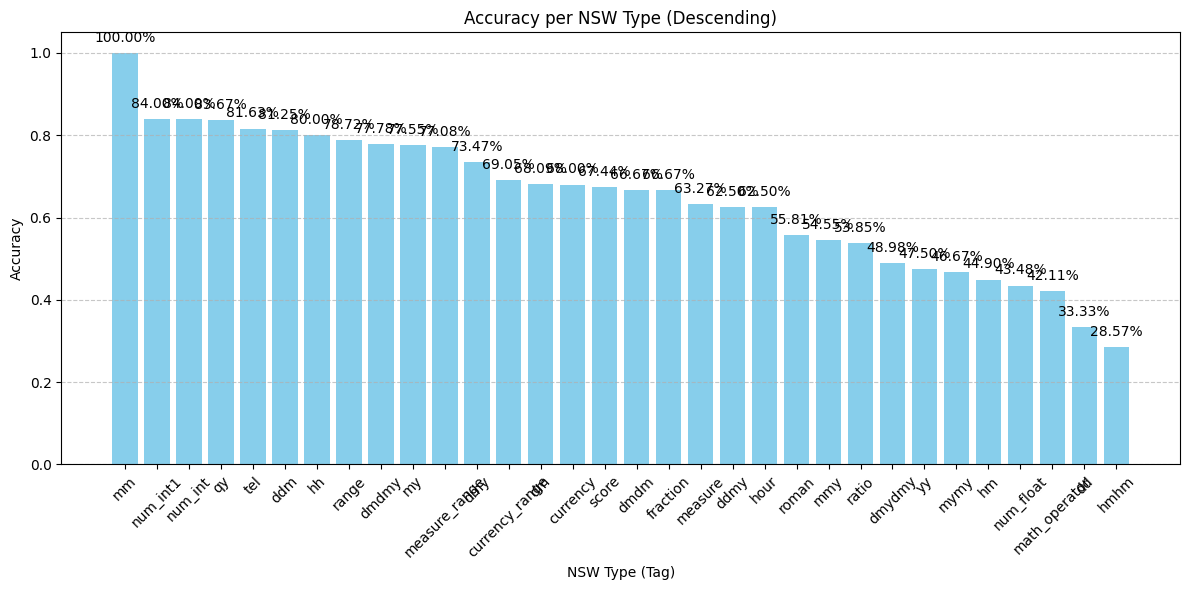

In [4]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-09/2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

# baseline

870 1191
0.7304785894206549


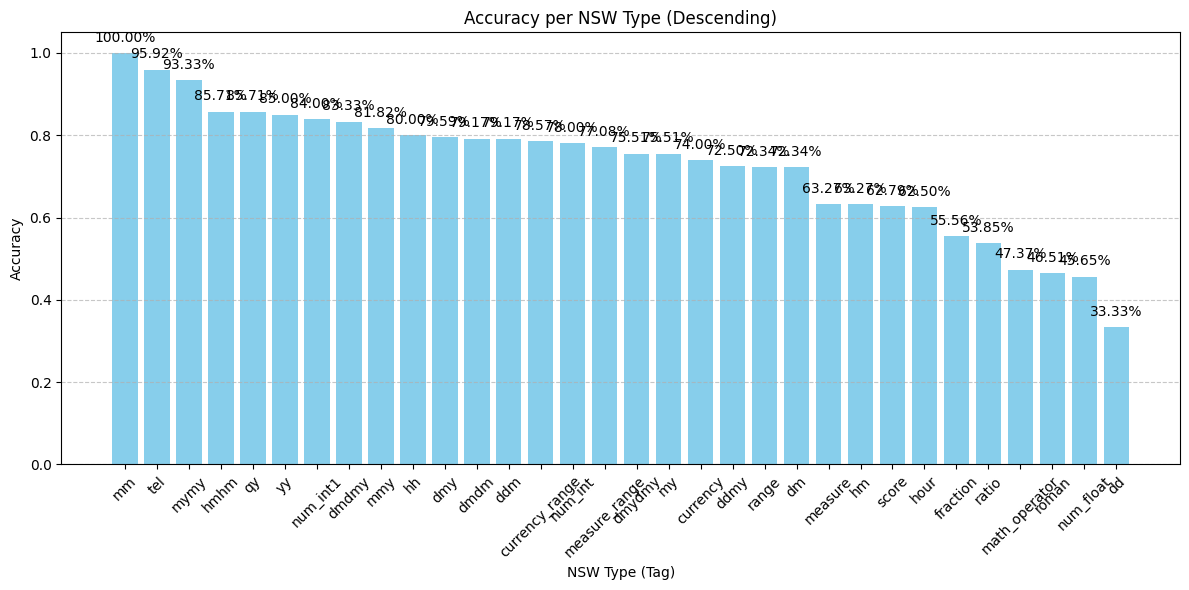

In [4]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-09/2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

879 1191
0.7380352644836272


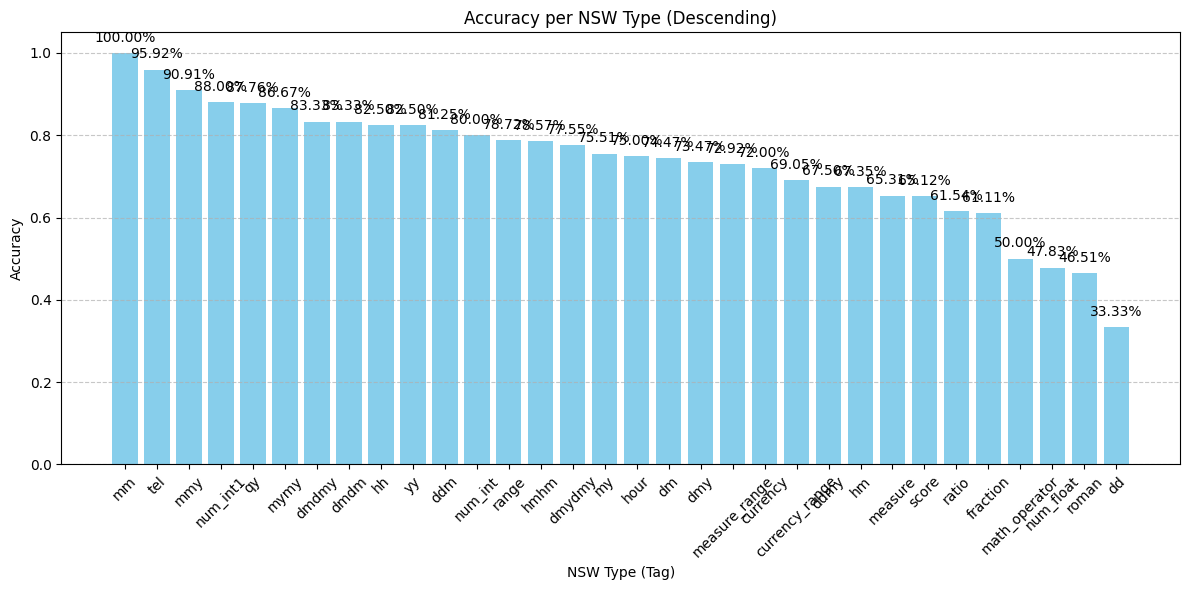

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-09/17:36:06_2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)